A3 For projects dealing with classification problem, employ various other classifiers such as Support
Vector Machines, Decision Tree, RandomForest, CatBoost, AdaBoost, XGBoost, Naïve-Bayes & MLP.
Tabulate your results for your problem using different performance metrics. Your tabulated results
should compare between train and test results and make appropriate observations.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


      Classifier  Train Accuracy  Test Accuracy  Train Precision  \
0            SVM        0.925926       0.142857         0.934641   
1  Decision Tree        1.000000       0.857143         1.000000   
2  Random Forest        1.000000       0.571429         1.000000   
3       AdaBoost        1.000000       0.714286         1.000000   
4        XGBoost        1.000000       0.428571         1.000000   
5    Naïve Bayes        0.703704       0.571429         0.806763   
6            MLP        1.000000       0.428571         1.000000   

   Test Precision  Train Recall  Test Recall  Train F1-score  Test F1-score  
0        0.047619      0.925926     0.142857        0.924874       0.071429  
1        0.904762      1.000000     0.857143        1.000000       0.863492  
2        0.828571      1.000000     0.571429        1.000000       0.571429  
3        0.857143      1.000000     0.714286        1.000000       0.726190  
4        0.809524      1.000000     0.428571        1.000000     

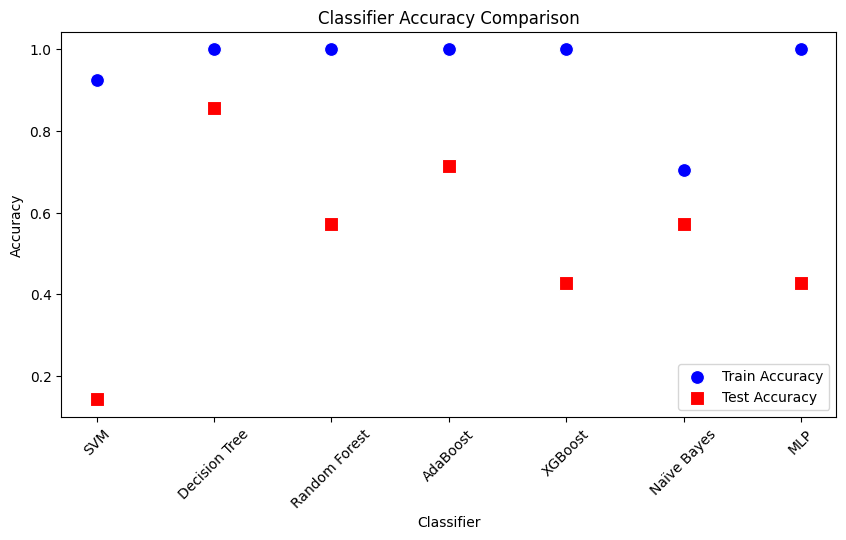

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "/content/Copy of 20230409_playback_data_for_upload(1).xlsx"
df = pd.read_excel(file_path, sheet_name='20230409_playback_data_for_uplo')


# Drop non-relevant columns (if any)
drop_columns = ['Date', 'Time', 'Comments']  # Modify if needed
df = df.drop(columns=[col for col in drop_columns if col in df.columns])

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle NaNs
    label_encoders[col] = le

# Handle missing values by imputing with mean for numerical columns
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :] = imputer.fit_transform(df)

# Split data into features and target
X = df.drop(columns=['Treatment'])
y = df['Treatment']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Naïve Bayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=500)
}

# Train and evaluate classifiers
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    results.append({
        "Classifier": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
        "Test Precision": precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
        "Train Recall": recall_score(y_train, y_train_pred, average='weighted', zero_division=0),
        "Test Recall": recall_score(y_test, y_test_pred, average='weighted', zero_division=0),
        "Train F1-score": f1_score(y_train, y_train_pred, average='weighted', zero_division=0),
        "Test F1-score": f1_score(y_test, y_test_pred, average='weighted', zero_division=0),
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce memory usage by using scatter plots instead of bar plots
plt.figure(figsize=(10, 5))

# Scatter plot for accuracy comparison
sns.scatterplot(x="Classifier", y="Train Accuracy", data=results_df, marker='o', label='Train Accuracy', color='blue', s=100)
sns.scatterplot(x="Classifier", y="Test Accuracy", data=results_df, marker='s', label='Test Accuracy', color='red', s=100)

plt.xticks(rotation=45)
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.legend()
plt.show()




